TODO 

ADD cross validation to the modelling section

# Basic classification models

* objectives:
  * fit several base models including: 
  * `logistic regression`, `decision tree`, `svm`, `random forest`, `gradient boosting`, `knn`, `naive bayes`, `neural networks`
  * use aggregate feature for modelling
  
* plan: 

1. libraries and functions
2. load data
3. preprocess data
   - [x] full days only
   - [x] normalise activity
   - [ ] resample (not done)
4. feature engineering
   - [x] `mean`, `std`, `min`, `max`, `sum`
   - [x] `active_periods`, `inactive_periods`
5. train/test split
6. modelling
   - [x] import libraries
   - [x] model selection
   - [x] model evaluation
   - [ ] add cross validation, 5 passes
7. interpretation / visualisation
   



## Import libraries and load functions

In [1]:
# import
import pandas as pd
from sklearn.preprocessing import StandardScaler

### functions
- [x] extract depresjon from folder
- [x] extract full days (1440 rows) records and minimum full records
- [ ] resample, e.g. to hourly
- [x] normalise data (mean = 0, std = 1)
- [ ] 

In [2]:
# load pl functions

%run ../code/pl-functions.py

## Extract data from folder

In [3]:
# load the data
df = extract_folder('../data/depresjon')

## Data preprocessing

### Extract full days only


In [4]:
# extract full days
df7 = extract_full_days(df, 7)

In [5]:
# print rows per id / 1440
#print(df7.groupby('id').size()/1440)

# print unique count of id
print(df7['id'].nunique())

# print days for each id
#num_days = df.groupby('id')['date'].nunique()
#print(num_days)

# print date range for condition_1 id
print(df7[df7['id'] == 'condition_1']['date'].min())
print(df7[df7['id'] == 'condition_1']['date'].max())

# print info
#print(df7.info())



55
2003-05-08
2003-05-23


### Resample - 

* I am skipping this optional step for now...I want to see if it runs on the complete df

### Normalise

In [6]:
# column to normalise
col_to_normlise = ['activity']

# normalise
df7_norm = normalise_data(df7, col_to_normlise)


C:\Users\zoona\OneDrive - UWE Bristol\DS Year 2\IGP-5\code\pl-functions.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalise] = scaler.fit_transform(df[columns_to_normalise])


## Feature engineering

This model will use 'activity levels per day' as the feature

In [7]:
# print info
print(df7_norm.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1527281 entries, 540 to 1570797
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  1527281 non-null  datetime64[ns]
 1   date       1527281 non-null  object        
 2   activity   1527281 non-null  float64       
 3   id         1527281 non-null  object        
 4   label      1527281 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 69.9+ MB
None


## Train / Test split

In [15]:
from sklearn.model_selection import train_test_split

"""
Split the dataset into training and testing sets.

Parameters:
    X (DataFrame): The input features.
    y (Series): The target variable.
    test_size (float): The proportion of the dataset to include in the test split.
    random_state (int): The seed used by the random number generator.

Returns:
    X_train (DataFrame): The training set of input features.
    X_test (DataFrame): The testing set of input features.
    y_train (Series): The training set of target variable.
    y_test (Series): The testing set of target variable.
"""
X = df7_feat.drop(['label', 'date', 'id'], axis=1)
y = df7_feat['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Models

**Logistic Regression:**
LR is a statistical model used in binary classification by modelling the log-odds of the probability of an event.
* Strengths: Simple, fast, and efficient for small dataset with limited features.
* Weaknesses: Assumes a linear decision boundary, can underperform with complex datasets.

**Random Forest:**
* RF is an ensemble learning method constructs multiple decision trees at training time and outputting the class that is the mode of the classes of the individual trees.
* Strengths: Handles categorical variables well, resistant to overfitting, can model non-linear decision boundaries.
* Weaknesses: *Can be slow on large datasets*, not easily interpretable.

**Support Vector Machine (SVM):**
* SVM is a powerful and flexible class of supervised algorithms for both classification and regression.
* Strengths: Effective in high dimensional spaces, or when number of dimensions is greater than the number of samples.
* Weaknesses: Does not directly provide probability estimates, can be *inefficient to train*.
  
**Decision Tree:**
* DT are a type of simple flowchart-like structure in which internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.
* Strengths: Simple to understand and interpret, requires little data preparation.
* Weaknesses: Prone to overfitting, can create biased trees if some classes dominate.

**K-Nearest Neighbors (KNN):**
* KNN is a type of *instance-based learning, or lazy learning*, where the function is only approximated locally and all computation is deferred until function evaluation.
* Strengths: Simple, effective for datasets with complex decision boundaries.
* Weaknesses: *Slow on large datasets*, sensitive to irrelevant features.

**Naive Bayes:**
* NB classifiers are a family of simple “probabilistic classifiers” based on applying Bayes’ theorem with strong (naïve) independence assumptions between the features.
* Strengths: Fast, simple, performs well with small datasets.
* Weaknesses: *Assumes that all features are independent*, which is rarely the case.

**Neural Network (MLPClassifier):**
* MLPClassifier stands for Multi-layer Perceptron classifier connects to a Neural Network. MLPClassifier relies on an underlying Neural Network to perform the task of classification.
* Strengths: Can model complex, non-linear patterns.
* Weaknesses: *Requires a lot of data and computational resources, not easily interpretable.*

**XGBoost**:
* XGBoost is an optimised distributed gradient boosting library designed to be highly efficient, flexible and portable.
* Strengths: Fast, accurate, supports regularisation to avoid overfitting.
* Weaknesses: *Can be slow to train*, not easily interpretable.

**LightGBM**:
* LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient with the following advantages: Faster training speed and higher efficiency, lower memory usage, better accuracy, support of parallel and GPU learning, capable of handling large-scale data.
* Strengths: Fast, uses less memory, higher accuracy.
* Weaknesses: Can overfit on small datasets, not easily interpretable.

**AdaBoost**:
* AdaBoost is a boosting algorithm which constructs a classifier. Adaboost creates a strong classifier from number of weak classifiers.
* Strengths: Fast, simple, less prone to overfitting.
* Weaknesses: Sensitive to noisy data and outliers.

**Quadratic Discriminant Analysis (QDA):**
* QDA is a classifier with a quadratic decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule.
* Strengths: Can model more complex decision boundaries than linear methods.
* Weaknesses: *Assumes that the observations are normally distributed*, which is rarely the case.

In [ ]:
#%pip install xgboost
#%pip install lightgbm

### Import model libraries

In [16]:
import time

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix


### Define models (broken into sets -not sure of time needed)

In [17]:
# full set
models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Neural Network', MLPClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('QDA', QuadraticDiscriminantAnalysis()),
    ('Gradient Boosting', GradientBoostingClassifier())
]


# models set 1
models1 = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),    
]


models_2 = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    
]

models_3 = [
    ('Neural Network', MLPClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),  
]

models_4 = [
    ('AdaBoost', AdaBoostClassifier()),
    ('QDA', QuadraticDiscriminantAnalysis()), 
    ('Gradient Boosting', GradientBoostingClassifier())
]

## Model evaluation function

In [78]:

results = []

def evaluate_models(models, X_train, y_train, X_test, y_test, print_results=True):
    """
    Evaluate the performance of different models on a given dataset.

    Parameters:
    - models (list): A list of tuples containing the name and model object.
    - X_train (array-like): Training data features.
    - y_train (array-like): Training data labels.
    - X_test (array-like): Test data features.
    - y_test (array-like): Test data labels.

    Returns:
    - results (list): A list of dictionaries containing the evaluation results for each model.
    """
    import time
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

    for name, model in models:
        start_time = time.time()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        end_time = time.time()
        elapsed_time = end_time - start_time

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        cr = classification_report(y_test, y_pred)

        if print_results:
            print(f'{name}:')
            print(f'Time taken: {elapsed_time} seconds')
            print(f'Accuracy: {accuracy}')
            print(f'Precision: {precision}')
            print(f'Recall: {recall}')
            print(f'F1 Score: {f1}')
            print(f'Matthews Correlation Coefficient: {mcc}')
            print(f'Confusion Matrix: {cm}')
            print(f'Classification Report: {cr}')
            print('\n\n')

        results.append({
            'name': name,
            'time': elapsed_time,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'mcc': mcc,
            'confusion_matrix': cm,
            'classification_report': cr
        })

    return results


## Models

In [79]:
results = evaluate_models(models, X_train, y_train, X_test, y_test, print_results=False)


[LightGBM] [Info] Number of positive: 296, number of negative: 572
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1491
[LightGBM] [Info] Number of data points in the train set: 868, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.341014 -> initscore=-0.658780
[LightGBM] [Info] Start training from score -0.658780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [84]:
# results to dataframe
df_results = pd.DataFrame(results)
#print(df_results.info())

# for each model, print cols 0:7
#print(df_results.iloc[:, 0:7])

#print(df_results.info())

In [96]:
# print top 3 of each metric
for column_label in df_results.columns[1:7]:
    print(column_label)
    print(df_results.sort_values(by=column_label, ascending=False).head(3)[['name', column_label]])
    print('\n\n')

time
                 name      time
6      Neural Network  0.243849
11  Gradient Boosting  0.194129
0       Random Forest  0.183593



accuracy
                 name  accuracy
0       Random Forest  0.701835
11  Gradient Boosting  0.697248
10                QDA  0.688073



precision
                 name  precision
0       Random Forest   0.622951
11  Gradient Boosting   0.594595
10                QDA   0.590909



recall
             name  recall
6  Neural Network   0.625
5     Naive Bayes   0.600
2   Decision Tree   0.550



f1
                 name        f1
11  Gradient Boosting  0.571429
6      Neural Network  0.558659
5         Naive Bayes  0.558140



mcc
                 name       mcc
11  Gradient Boosting  0.338549
0       Random Forest  0.331047
10                QDA  0.306159





### Results - summary - out of the box models: 

* **Accuracy** - proportion of total predictions correct ->    `gradient boost`

$$\frac{{\text{{True Positive}} + \text{{True Negative}}}}{{\text{{Total Prediction}}}}$$

* **Precision**: proportion of positive prediction that are actually correct (Positive Predictive value) -> `neural network`
  
$$\frac{{\text{{True Positive}}}}{{\text{{True Positives}}+ \text{{False Positives}}}}$$

* **Recall**: proportion of actual positives that are correctly identified (aka Sensitivity) -> `Naive Bayes`

$$\frac{{\text{{True Positive}}}}{{\text{{True Positives}} + \text{{False Negatives}}}}$$

* **F1**: harmonic mean of Precision and Recall -> `gradient boost`

$$\frac{{{{2}} * \text{{(Precision}} * \text{{Recall)}}}}{{\text{{Precision}} + \text{{Recall}}}}$$

* **MCC**: measure of quality of binary classifications - considered a balanced measure ->  `gradient boost`

$$\frac{{\text{{(TP * TN - FP *FN)}}}}{{\text{{sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))}}}}$$

* **Quickest**: time ->  `Naive Bayes`



#### Reminder: 

* `True Positives (TP)`:  model predicted positive, and the truth is also positive.
* `True Negatives (TN)`:  model predicted negative, and the truth is also negative.
* `False Positives (FP)`: model predicted positive, and the truth is negative.
* `False Negatives (FN)`: model predicted negative, and the truth is positive.

In [ ]:
# print classification report for eaach model 
for i in range(0, len(df_results)):
    print(df_results['name'][i])
    print(df_results['classification_report'][i])
    print('\n\n')


Random Forest
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       138
           1       0.62      0.47      0.54        80

    accuracy                           0.70       218
   macro avg       0.68      0.65      0.66       218
weighted avg       0.69      0.70      0.69       218




SVM
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       138
           1       0.54      0.51      0.53        80

    accuracy                           0.66       218
   macro avg       0.63      0.63      0.63       218
weighted avg       0.66      0.66      0.66       218




Decision Tree
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       138
           1       0.54      0.55      0.54        80

    accuracy                           0.66       218
   macro avg       0.64      0.64      0.64       218
weighted avg       0.66      0.66   

## Visualise results


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

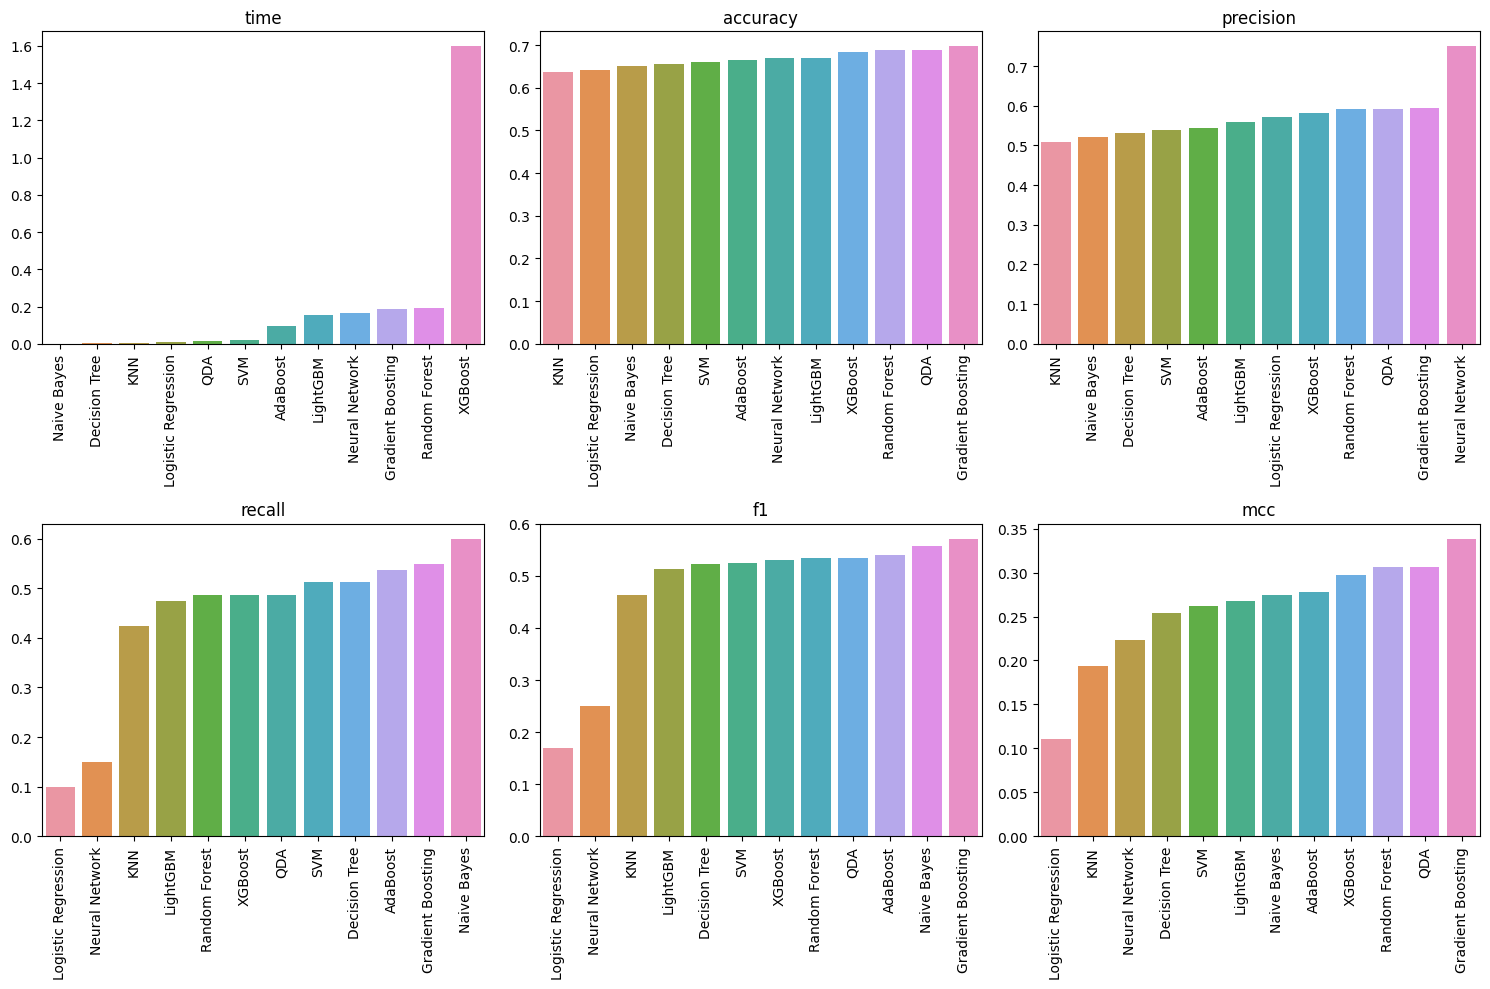

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# List of metrics
metrics = ['time', 'accuracy', 'precision', 'recall', 'f1', 'mcc']
labels = ['Time', 'Scores', 'Scores', 'Scores', 'Scores', 'Scores']

# Plot each metric
for i, metric in enumerate(metrics):
    row = i // 3 # Integer division to convert i into a row index
    col = i % 3 # Modulo division to convert i into a column index
    ax = axs[row, col]
    df_sorted = df_results.sort_values(metric)  # sort by the current metric
    sns.barplot(data=df_sorted, x='name', y=metric, ax=ax) 
    ax.set_xticklabels(df_sorted['name'], rotation=90)  # set x-tick labels to the names in the sorted DataFrame
    ax.set_title(metric)
    ax.set_xlabel('')  # Remove x-axis title
    ax.set_ylabel('')  # Remove y-axis title

plt.tight_layout()
plt.show()




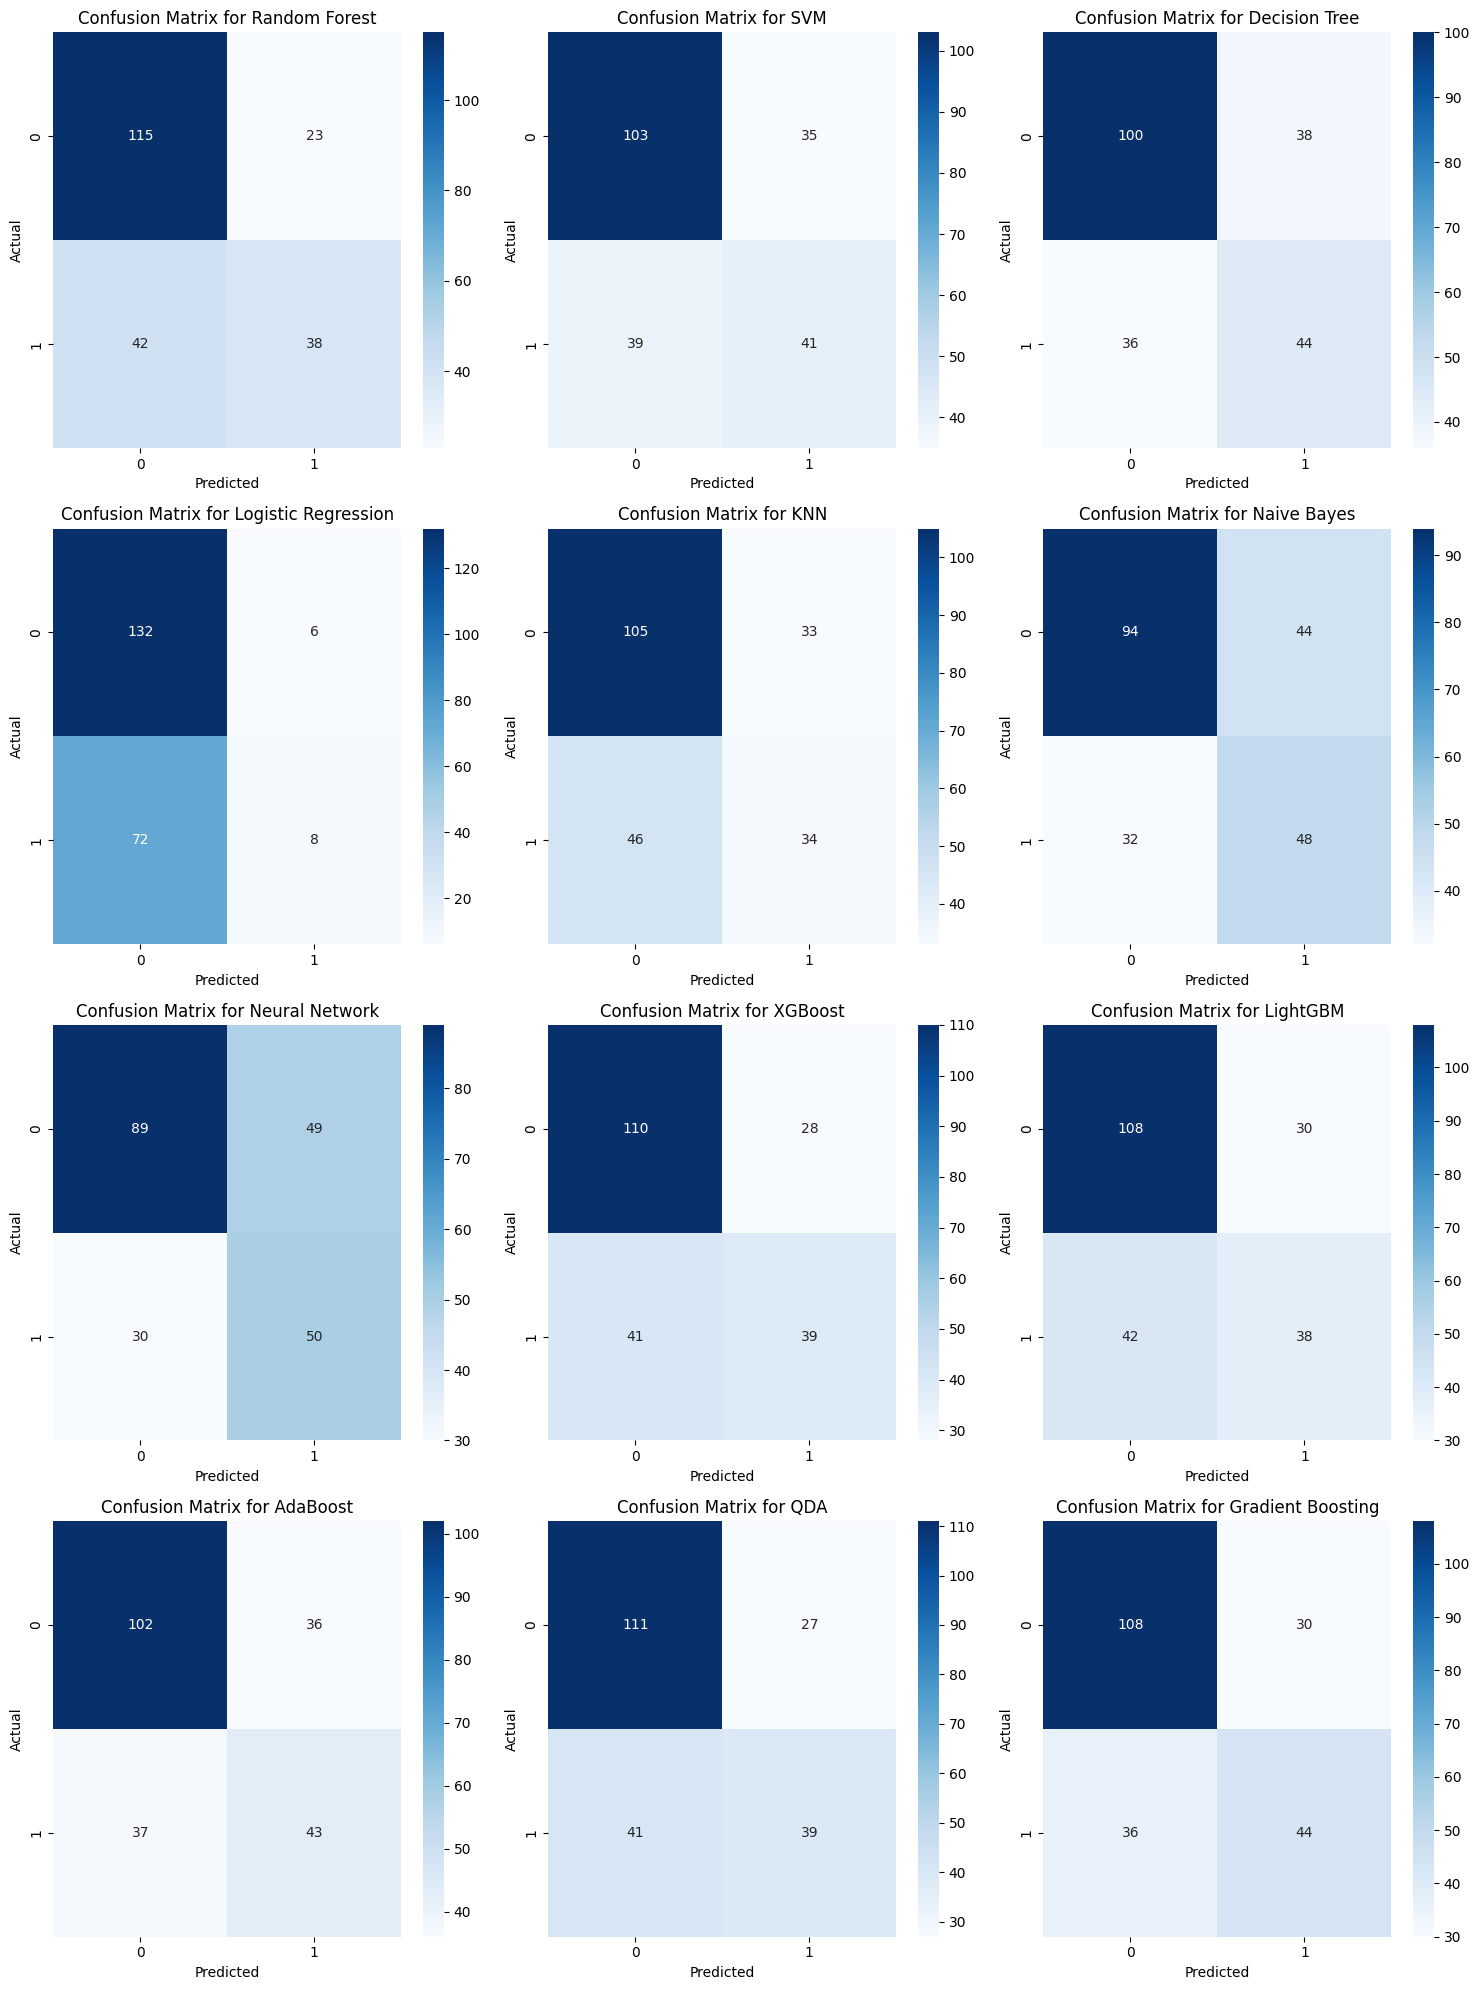

In [82]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Ensure that the number of subplots matches the number of models
assert len(axs.flatten()) >= len(results)

# Plot the confusion matrix for each model
for i, result in enumerate(results):
    ax = axs.flatten()[i]

    name = result['name']
    cm = result['confusion_matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'Confusion Matrix for {name}')

# If there are more subplots than models, hide the extra subplots
for j in range(i+1, len(axs.flatten())):
    axs.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


